In [61]:
import importlib
import sys
import pickle
import numpy as np
import pandas
from scipy import stats

from matplotlib import pyplot as plt
import matplotlib.dates as md

from datetime import datetime, timezone

/tmp/ipykernel_119781/1268033835.py:80: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'), freq='3H'), density=True)


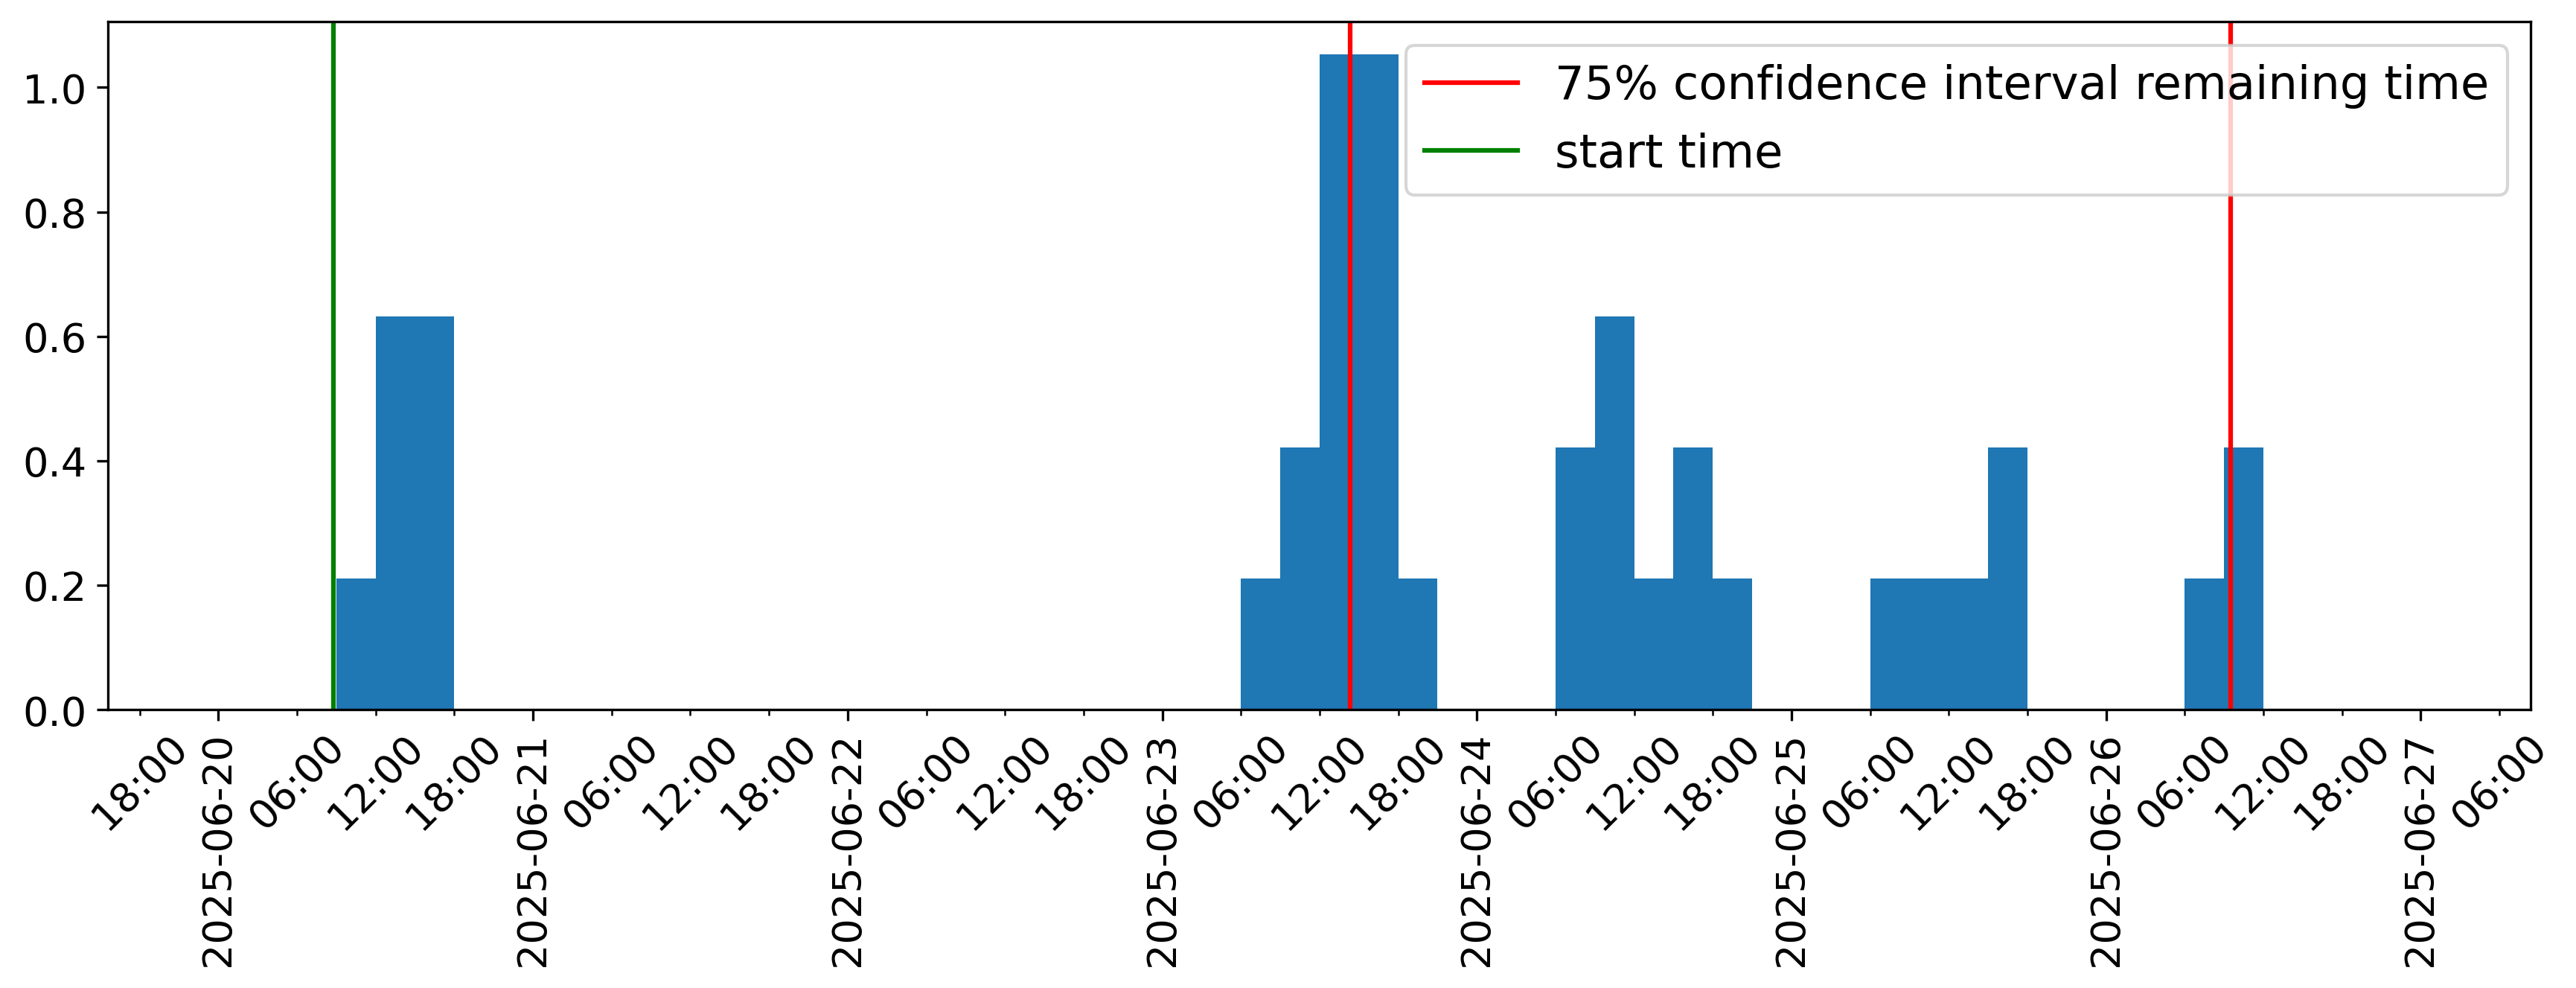

In [63]:

start_time = datetime(2025, 6, 20, 8, 47, tzinfo=timezone.utc)

case_samples = sorted([
    # Friday
    datetime(2025, 6, 20, 12, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 11, 59, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 17, 50, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 16, 38, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 17,  3, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 12, 34, tzinfo=timezone.utc),
    datetime(2025, 6, 20, 13, 48, tzinfo=timezone.utc),

    # Monday
    datetime(2025, 6, 23,  8, 38, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 11, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 11, 59, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 13, 10, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 13, 37, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 14, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 16,  2, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 15, 40, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 17, 40, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 17, 59, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 13, 50, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 14,  2, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 15,  3, tzinfo=timezone.utc),
    datetime(2025, 6, 23, 18, 10, tzinfo=timezone.utc),

    # Tuesday
    datetime(2025, 6, 24,  8, 10, tzinfo=timezone.utc),
    datetime(2025, 6, 24,  8, 40, tzinfo=timezone.utc),
    datetime(2025, 6, 24,  9, 30, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 10,  2, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 11, 55, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 13, 55, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 15, 45, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 16, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 24, 18, 3, tzinfo=timezone.utc),


    # Wednesday
    datetime(2025, 6, 25,  7, 45, tzinfo=timezone.utc),
    datetime(2025, 6, 25,  9, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 25, 12, 30, tzinfo=timezone.utc),
    datetime(2025, 6, 25, 16, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 25, 17, 40, tzinfo=timezone.utc),

    # Thursday
    datetime(2025, 6, 26,  8, 20, tzinfo=timezone.utc),
    datetime(2025, 6, 26,  9,  3, tzinfo=timezone.utc),
    datetime(2025, 6, 26,  9, 30, tzinfo=timezone.utc),
])

real_end_time = datetime(2025, 6, 23, 8, 49, tzinfo=timezone.utc)

plt.figure(figsize=(14, 4))
#plt.xticks( rotation=25 )
#print(case_samples)
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
#ax.xaxis.set_minor_locator(md.HourLocator(interval=6))  # Every 2 hours

mxfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_minor_formatter(mxfmt)
ax.xaxis.set_minor_locator(md.HourLocator(byhour=[6, 12, 18]))
ax.tick_params(axis='x', which='major', labelsize=13, rotation=90)
ax.tick_params(axis='x', which='minor', labelsize=13, rotation=45)
ax.tick_params(axis='y', labelsize=13)

for label in ax.get_xticklabels():
    if '-' in str(label):
        pass
    else:
        label.set_ha('right')


#plt.gcf().autofmt_xdate()
plt.gcf().set_dpi(300)
plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'), freq='3H'), density=True)


plt.axvline(x=case_samples[int(len(case_samples) * 1 - 0.75/2)], color='red')
plt.axvline(x=case_samples[int(len(case_samples) * 0.75/2)], color='red', label='75% confidence interval remaining time')

plt.axvline(x=start_time, color='green', label='start time')


plt.legend(fontsize=15)
#plt.show()

plt.savefig("run_time.svg")

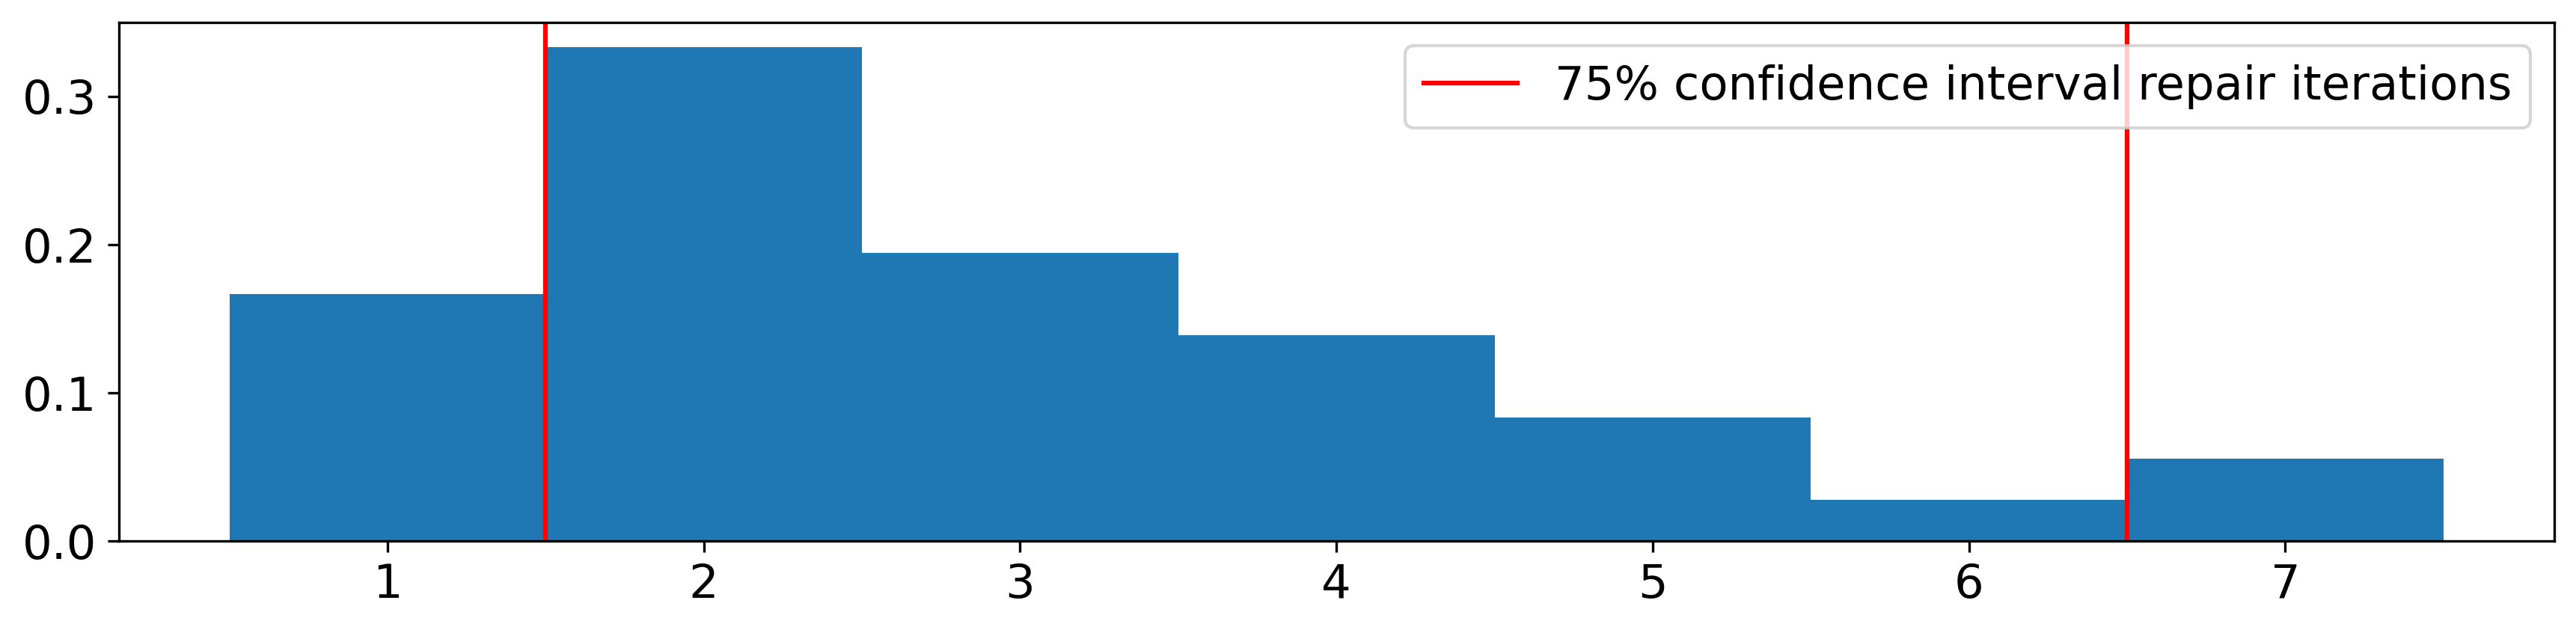

In [73]:
plt.figure(figsize=(14, 3))
ax=plt.gca()


case_samples = sorted([1]*6 + [2]*8 + [3]*7 + [4]*5 + [5]*3 + [2]*4 + [6]*1 + [7]*2)


plt.gcf().set_dpi(300)
plt.hist(case_samples, bins=np.arange(min(case_samples)-0.5,max(case_samples)+0.51, 1), density=True)

plt.axvline(x=case_samples[int(len(case_samples) * 1 - 0.75/2)]-0.5, color='red')
plt.axvline(x=case_samples[int(len(case_samples) * 0.75/2)]-0.5, color='red', label='75% confidence interval repair iterations')

ax.tick_params(labelsize=15)
plt.legend(fontsize=15)
#plt.show()

plt.savefig("repair_cycles.svg")